# Прогнозирование оттока клиентов

<h1>Описание проекта</h1>

**Цель проекта:** для оператора связи необходимо разработать модель прогнозирования оттока клиентов для планирования мер, направленных на удержание клиента (промокоды и специальные условия). 

- Целевая метрика качества модели - `ROC-AUC`. 
- Дополнительная метрика качества - `Accuracy`.

**Примечание:** информация о договорах актуальна на 1 февраля 2020.

<h1>Описание услуг</h1>

Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
-  Интернет. Подключение может быть двух типов: через телефонную линию (*DSL*) или оптоволоконный кабель (*Fiber optic*).  

**Дополнительные услуги**:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).



<h1>Описание данных</h1>

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Датафрейм-Phone" data-toc-modified-id="Датафрейм-Phone-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Датафрейм Phone</a></span></li><li><span><a href="#Датафрейм-Internet" data-toc-modified-id="Датафрейм-Internet-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Датафрейм Internet</a></span></li><li><span><a href="#Датафрейм-Personal" data-toc-modified-id="Датафрейм-Personal-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Датафрейм Personal</a></span></li><li><span><a href="#Датафрейм-Contract" data-toc-modified-id="Датафрейм-Contract-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Датафрейм Contract</a></span></li></ul></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Анализ-объединенного-датафрейма" data-toc-modified-id="Анализ-объединенного-датафрейма-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ объединенного датафрейма</a></span><ul class="toc-item"><li><span><a href="#Создание-объединенного-датафрейма" data-toc-modified-id="Создание-объединенного-датафрейма-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Создание объединенного датафрейма</a></span></li><li><span><a href="#Определение-портрета-уходящего-клиента" data-toc-modified-id="Определение-портрета-уходящего-клиента-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Определение портрета уходящего клиента</a></span></li><li><span><a href="#Матрица-корреляций-признаков" data-toc-modified-id="Матрица-корреляций-признаков-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Матрица корреляций признаков</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Dummy" data-toc-modified-id="Dummy-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Dummy</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#XGBClassifier" data-toc-modified-id="XGBClassifier-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>XGBClassifier</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>LGBMClassifier</a></span></li><li><span><a href="#Анализ-результатов" data-toc-modified-id="Анализ-результатов-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Анализ результатов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Оценка-важности-признаков" data-toc-modified-id="Оценка-важности-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Оценка важности признаков</a></span></li><li><span><a href="#Доработка-итоговой-модели" data-toc-modified-id="Доработка-итоговой-модели-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Доработка итоговой модели</a></span><ul class="toc-item"><li><span><a href="#Удаление-признака-InternetService,-объединение-StreamingTV-и-StreamingMovies" data-toc-modified-id="Удаление-признака-InternetService,-объединение-StreamingTV-и-StreamingMovies-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Удаление признака InternetService, объединение StreamingTV и StreamingMovies</a></span></li><li><span><a href="#Удаление-признака-InternetService,-Объединение-признаков-дополнительных-опций-в-один" data-toc-modified-id="Удаление-признака-InternetService,-Объединение-признаков-дополнительных-опций-в-один-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Удаление признака InternetService, Объединение признаков дополнительных опций в один</a></span></li></ul></li><li><span><a href="#Оценка-прибыльности-модели" data-toc-modified-id="Оценка-прибыльности-модели-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Оценка прибыльности модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Отчет-по-работе" data-toc-modified-id="Отчет-по-работе-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Отчет по работе</a></span></li></ul></div>

## Исследовательский анализ данных

### Загрузка данных

In [1]:
# !pip install phik -U -q
# !pip install shap --user -q

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
import shap

import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_data(link:str)->pd.DataFrame:
    '''
    Принимает ссылку и извлекает датафрейм.
    '''
    try:
        return pd.read_csv('C://Users//user//Desktop//jupiter_notebook//gradproject//' + link)
    except:
        return pd.read_csv('/datasets/' + link)

In [4]:
phone = get_data('phone_new.csv')
internet = get_data('internet_new.csv')
personal = get_data('personal_new.csv')
contract = get_data('contract_new.csv')

### Изучение данных

*Напишем необходимые для изучения датафреймов функции.*

In [5]:
def data_review(data:pd.DataFrame)->None:
    '''
    Выводит общую информацию о датафрейме.
    '''
    print('Общая информация о датафрейме:')
    display(data.info())
    print('='*60)
    print('Описание датафрейма')
    display(data.describe())
    print('='*60)
    print('Первые 5 строчек датафрейма:')
    display(data.head())
    print('='*60)
    print('Количество строк-дубликатов:', data.duplicated().sum())
    print('='*60)
    print('Количество повторяющихся customerID:', data['customerID'].duplicated().sum())

In [6]:
def val_count(df)->None:
    '''
    Строит графики для катергориальных признаков
    '''
    for val in df.columns:
        if len(df[val].unique()) < 10:
            plt.figure(figsize=(10, 4))
            sns.countplot(data=df, x=val, palette='pastel')
            plt.title(val, fontsize=16)
            plt.grid(True, axis='y')
            plt.show()
            print('='*100)

#### Датафрейм Phone

In [7]:
data_review(phone)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

Описание датафрейма


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


Первые 5 строчек датафрейма:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Количество строк-дубликатов: 0
Количество повторяющихся customerID: 0


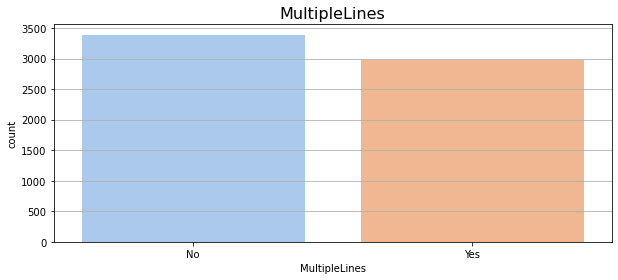

In [8]:
val_count(phone)

***Вывод:*** *датафрейм `Phone` содержит информацию о пользователях стационарной телефонной связи. В стоблце `MultipleLines` указано, подключена ли у пользователя опция, позволяющая вести параллельные линии во время звонка. Гистограмма данного признака демострирует нам, что количество абонентов без данной опции слегка превышает количество абонентов, использующих ее. Пропуски и дубликаты отсутствуют.*

#### Датафрейм Internet

In [9]:
data_review(internet)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

Описание датафрейма


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Первые 5 строчек датафрейма:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Количество строк-дубликатов: 0
Количество повторяющихся customerID: 0


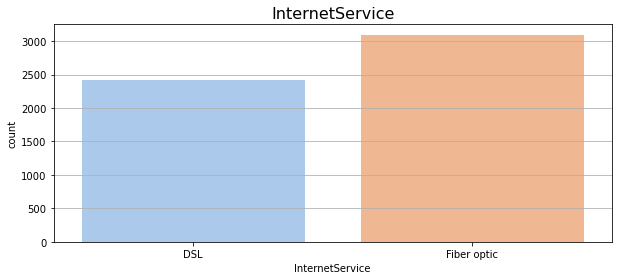

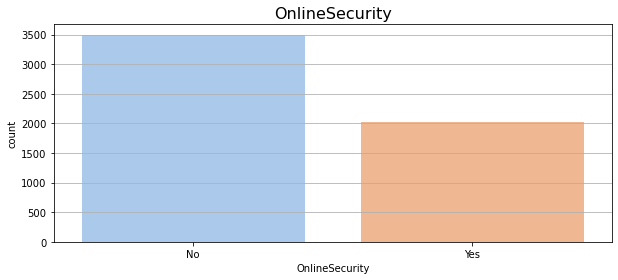

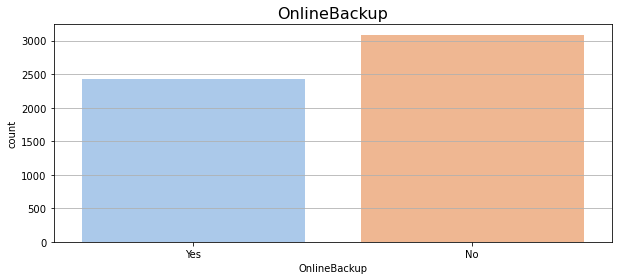

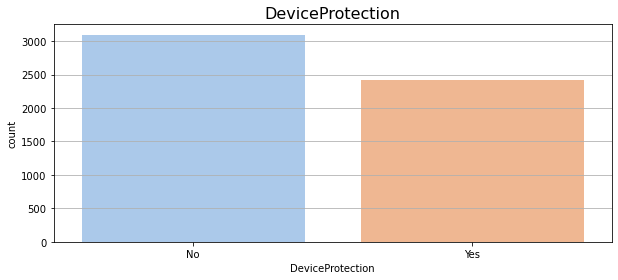

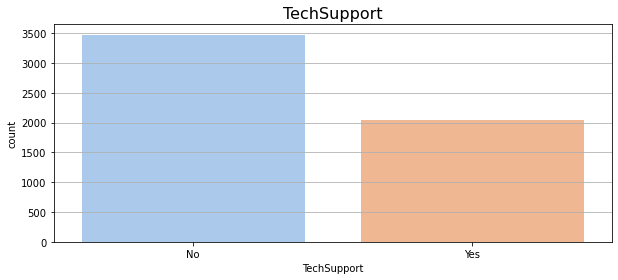

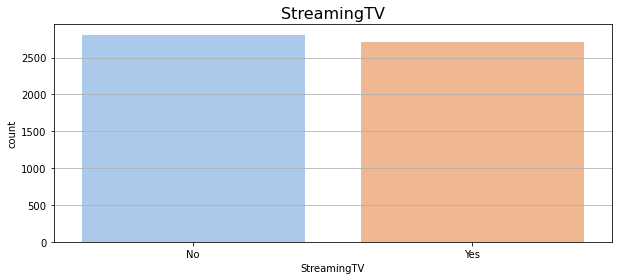

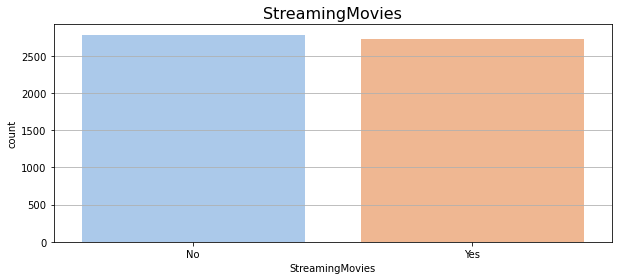

In [10]:
val_count(internet)

***Вывод:*** *датафрейм `Internet` содержит информацию о пользователях интернет-услуг: какой тип соединения они используют, какие дополнительные услуги подключены. Можем увидеть, что число клиентов, использующих оптоволоконный кабель, превышает число клиентов с другим типом соединения. Также можно отметить, что клиенты оператора реже подключают себе услуги, связанные с защитой устройств, фильтрацией контента, технической поддержкой и облачными хранилищами. А вот стримминговые сервисы подлкючаются с большей охотой: количество людей с подключенной опцией примерно равно количеству людей, ее не использующей. Строки-дубликаты и пропуски отсутствуют.*

#### Датафрейм Personal

In [11]:
data_review(personal)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

Описание датафрейма


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Первые 5 строчек датафрейма:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Количество строк-дубликатов: 0
Количество повторяющихся customerID: 0


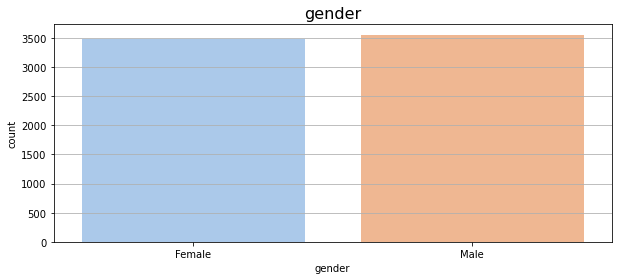

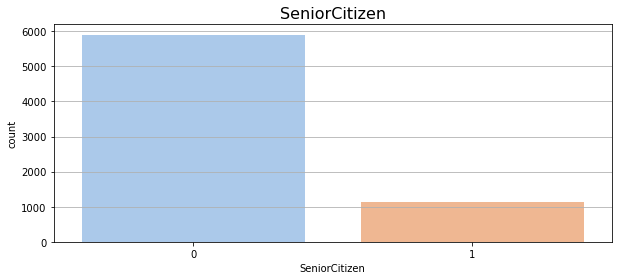

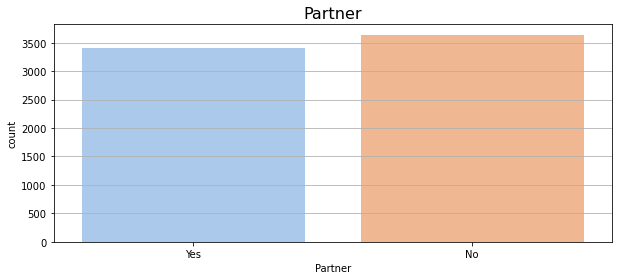

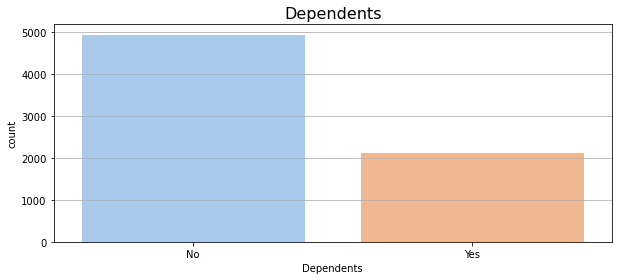

In [12]:
val_count(personal)

***Вывод:*** *датафрейм `Personal` содержит информацию о персональных данных клиента. Мы можем наблюдать примерное равенство количества пользотелей-мужчин и пользователей-женщин, так же можно сказать и о холостых пользователях и пользователях, состоящих в браке, хотя в данном случае разница более ощутима. Отметим, что по большей части услугами оператора связи пользуются люди, не достигшие пенсионного возраста и не имеющие иждивенцев.*

#### Датафрейм Contract

In [13]:
data_review(contract)

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

Описание датафрейма


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


Первые 5 строчек датафрейма:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Количество строк-дубликатов: 0
Количество повторяющихся customerID: 0


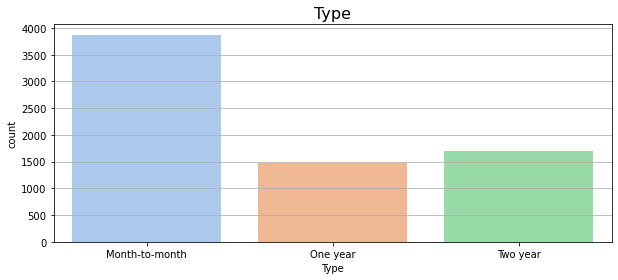

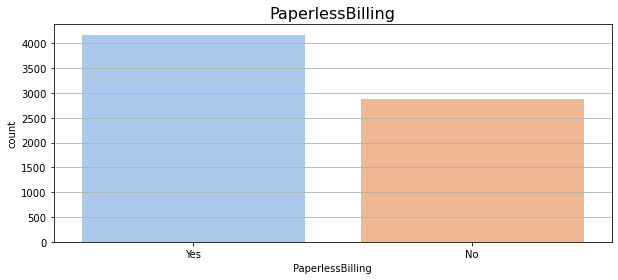

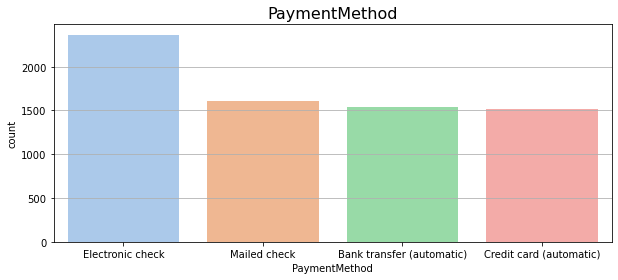

In [14]:
val_count(contract)

*Создадим целевой признак `Exited` по столбцу `EndDate`, в котором наличие даты говорит о том, что клиент ушел, а значение "No" - клиент остался.*

In [15]:
contract['Exited'] = contract['EndDate'].apply(lambda x: 0 if x=='No' else 1)

*Проверим наличие клиентов, разорвавших контракт в день создания таблицы.*

In [16]:
contract.loc[contract['EndDate'] == '2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited


*Таких клиентов нет. Заменим значение "No" на дату составления таблицы.*

In [17]:
contract['EndDate'] = contract['EndDate'].apply(lambda x: '2020-02-01' if x=='No' else x)

*Преобразуем типы данных в столбцах с датами. Заменим их на `datetime64`.*

In [18]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'] , format='%Y-%m-%d')
contract['EndDate'] = pd.to_datetime(contract['EndDate'] , format='%Y-%m-%d')

*Изучим распределение величины ежемесячных платежей из столбца `MonthlyCharges`.*

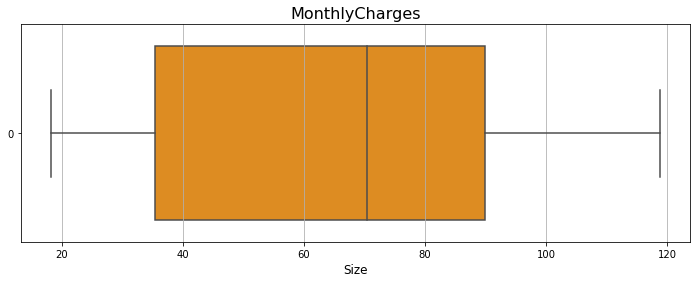

In [19]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=contract['MonthlyCharges'], orient='h', color='#fc9003')
plt.title('MonthlyCharges', fontsize=16)
plt.xlabel('Size', fontsize=12)
plt.grid(True, axis='x')

*Данные выглядят нормально, значения, выходящие за рамки "усов" отсутствуют.*

*Данные в столбце `TotalCharges` имеют тип данных "object", хотя по значениям в этом столбце видно, что должен быть "floa64". Поменять тип данных вручную не получается из-за наличия строк с пробелом вместо значения. Найдем эти строчки.*

In [20]:
contract.loc[contract['TotalCharges'].apply(lambda x: re.search(r'[0-9]+\.[0-9]+', str(x))).isnull()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,,0


*Глядя на значения в столбце `BeginDate`, становится понятно, с чем связано пустое значение в столбце `TotalCharges`: пользователи, ставшие клиентами оператора в день создания таблицы либо не успели внести платеж, либо он не успел дойти. В таком случае заполним пустые значения в столбце `TotalCharges` величиной месячного платежа.*

In [21]:
contract.loc[contract['TotalCharges']
             .apply(lambda x: re.search(r'[0-9]+\.[0-9]+', str(x)))
             .isnull(), 'TotalCharges'] = contract.loc[contract['TotalCharges']
                                                       .apply(lambda x: re.search(r'[0-9]+\.[0-9]+', str(x)))
                                                       .isnull(), 'MonthlyCharges']

In [22]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')

*Изучим распределение велечины суммарных платежей из столбца `TotalCharges`.*

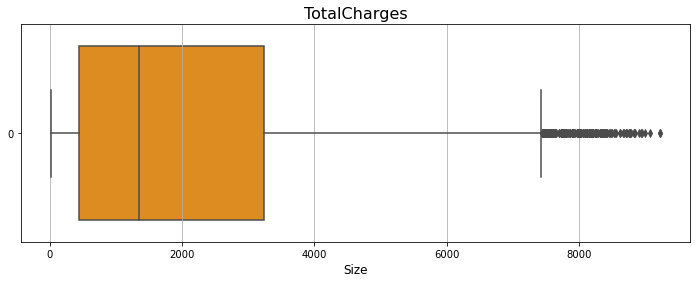

In [23]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=contract['TotalCharges'], orient='h', color='#fc9003')
plt.title('TotalCharges', fontsize=16)
plt.xlabel('Size', fontsize=12)
plt.grid(True, axis='x')

*Можем заметить наличие значений, определенных диаграммой размаха выбросами. Проверим, являются ли эти данные аномальными.*

*Для начала проверим, все ли в порядке с размером величины ежемесячного платежа.*

In [24]:
mintc = contract.loc[contract['TotalCharges'] > 7000, 'MonthlyCharges'].min()
print('Минимальный размер ежемесячного платежа для клиентов с общей суммой платежей свыше 7000 -', mintc)

Минимальный размер ежемесячного платежа для клиентов с общей суммой платежей свыше 7000 - 89.4


In [25]:
maxtc = contract.loc[contract['TotalCharges'] > 7000, 'MonthlyCharges'].max()
print('Минимальный размер ежемесячного платежа для клиентов с общей суммой платежей свыше 7000 -', maxtc)

Минимальный размер ежемесячного платежа для клиентов с общей суммой платежей свыше 7000 - 118.6


*Данные выглядят нормально.*

*Узнаем самую позднюю дату заключения контракта с оператором среди потенциально аномальных пользователей и выведем информацию о контрактах этих пользователей.*

In [26]:
contract.loc[(contract['BeginDate'] == contract.loc[contract['TotalCharges'] > 7000, 'BeginDate'].max()) & (contract['TotalCharges'] > 7000)]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
3908,8261-GWDBQ,2015-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),116.05,7241.52,0
3912,3882-IYOIJ,2015-02-01,2020-02-01,Two year,No,Credit card (automatic),115.25,7537.35,0


*Полученные данные не противоречат здравому смыслу, что наталкивает нас на вывод о том, что значения величины суммарных платежей, вышедших за вернюю границу нашего боксплота свойствены старым клиентам.*

***Вывод:*** *датафрейм `Contract` содержит информацию о контрактах клиентов оператора связи: даты заключения и расторжения договора, тип контракта, способы и размеры оплаты. С некоторыми данными возникли небольшие проблемы, в частности, в столбце `TotalCharges` у клиентов, заключивших договор в день выгрузки таблиц, отсутствовали значения. Эти пропуски были заполнены величиной месячного платежа. Также возникли подозрения о наличии аномальных значений в этом же столбце, но после подробного изучения этих клиентов было принято решение оставить эти данные.* 

*На основе информации из столбца `EndDate` был создан целевой для будущих моделей признак `Exited` по следующему принципу: наличие даты в столбце `EndDate` говорит о том, что клиент ушел, а значение "No" - клиент остался.*

### План работы

*После проведения первичного ознакомления и анализа имеющихся данных был намечен следующий план работы:*

Этап 1. Объединение и последующий анализ полного датафрейма.
- *заполнение пропусков;*
- *создание новых признаков;
- *создание целевого признака на основе признака `EndDate`;*
- *определение портрета уходящего клиента;*
- *составление матрицы корреляций признаков;*

Этап 2. Обучение моделей.
- *подготовка данных к обучению:*
    - *разбиение данных на целевой признак и признаки-предикторы;*
    - *разбиение данных на обучающую и тестовую выборки в соотношении 3 к 1;*
    - *обработка категориальных признаков с помощью `OneHotEncoder`, числовых - с помощью `StandardScaller`;*
- *обучение моделей МО, выбор лучшей из них по метрике качества ROC-AUC;*
- *тестирование модели;*
- *оценка важности признаков-предикторов;*
- *доработка модели;*

Этап 3. Отчет по работе.
- *написание отчета по работе;*

### Анализ объединенного датафрейма

#### Создание объединенного датафрейма

*Для проведения дальнейшего анализа и предобработки данных необходимо объединить датафреймы. Однако стоит заметить, что датафреймы различаются по количеству строк в них, поэтому, чтобы не потерять информацию о клиентах, при объединении таблиц воспользуемся методом `outer`.*

In [27]:
data_full = phone.merge(internet, on='customerID', how='outer')
data_full = data_full.merge(personal, on='customerID', how='outer')
data_full = data_full.merge(contract, on='customerID', how='outer')

In [28]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   MultipleLines     6361 non-null   object        
 2   InternetService   5517 non-null   object        
 3   OnlineSecurity    5517 non-null   object        
 4   OnlineBackup      5517 non-null   object        
 5   DeviceProtection  5517 non-null   object        
 6   TechSupport       5517 non-null   object        
 7   StreamingTV       5517 non-null   object        
 8   StreamingMovies   5517 non-null   object        
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  BeginDate         7043 non-null   datetime64[ns]
 14  EndDate           7043 n

*Установим в качестве индексов ID клиента из столбца `customerID`.*

In [29]:
data_full.set_index('customerID', inplace=True)

*Можем заметить, что в результате объединения таблиц в некоторых столбцах образовались пропуски. Связано это с тем, что если клиент не пользуется услугой, то информация о нем не попадает в соответствующую таблицу. Предлагаю заполнить пропуски в столбцах `MultipleLines` и `InternetService` значением "NU" - not used. А пропуски в столбцах, связанных с интернет услугами, заполним значением "No".*

In [30]:
data_full[['MultipleLines', 'InternetService']] = data_full[['MultipleLines', 'InternetService']].fillna('NU')
data_full.iloc[:,2:9] = data_full.iloc[:,2:9].fillna('No')

*Создадим дополнительный признак `Duration` - длительность контракта.*

In [31]:
data_full['Duration'] = (data_full['EndDate'] - data_full['BeginDate']).dt.days

**Вывод:** *был создан объединенный датафрейм, заполнены пропуски, образовавшиеся при объединении, и создан новый признак `Duration`.*

#### Определение портрета уходящего клиента

*Теперь, когда у нас в наличии объединенный датафрейм, попробуем определить, что характеризует ушедшего пользователя.*

*Разделим признаки на категориальные и числовые.*

In [32]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'Duration']

In [33]:
cat_cols = [col for col in data_full.columns if col not in num_cols \
            and col not in ['BeginDate', 'EndDate', 'Exited']]

*Рассмотрим, влияли ли размер месячной платы на расторжение контракта, а также выясним, как долго пользователь был клиентом оператора перед тем, как уйти.*

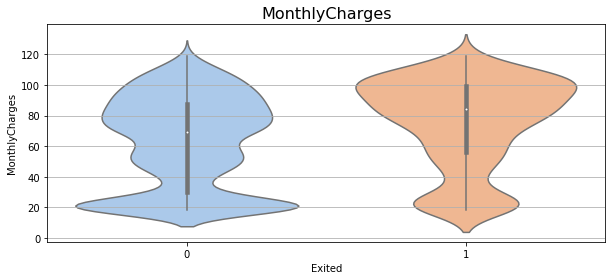

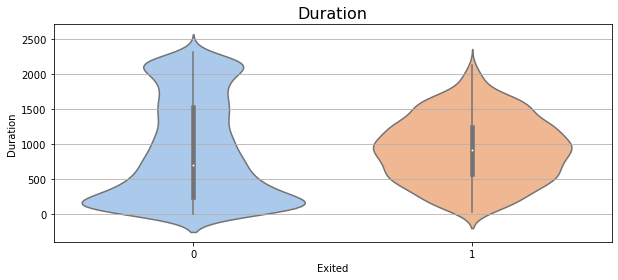

In [34]:
for val in ['MonthlyCharges', 'Duration']:
    plt.figure(figsize=(10, 4))
    sns.violinplot(data=data_full, x='Exited', y=val, palette='pastel')
    plt.title(val, fontsize=16)
    plt.grid(True, axis='y')
    plt.show()
    print('='*100)

*Глядя на получившиеся графики можно сразу отметить, что ушедшие пользователи были обременены высокой месячной платой.*

*Если говорить о времени, прошедшем с момента заключения контракта, то можем отметить два пика на графике оставшихся клиентов: первый пик - относительно новые клиенты, второй - пользователи, являющиеся клиентами оператора более 2000 дней. В случае с ушедшими пользователями наблюдается распределение близкое к нормальному.*

*Узнаем, что еще можно сказать о портрете ушедшего пользователя.*

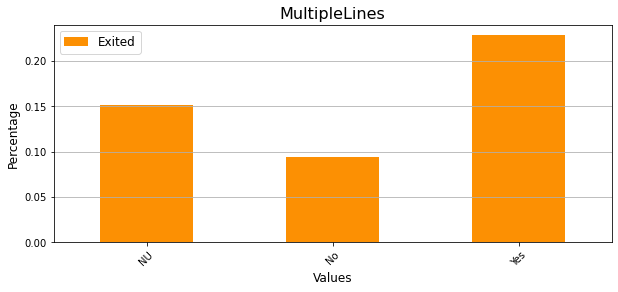

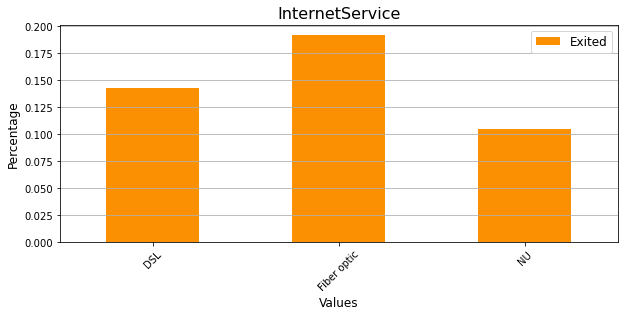

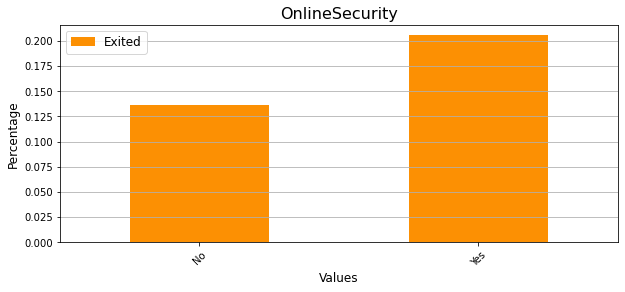

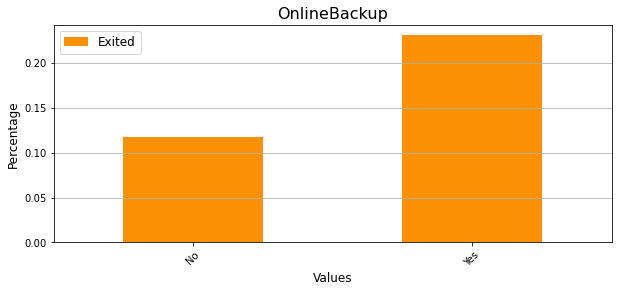

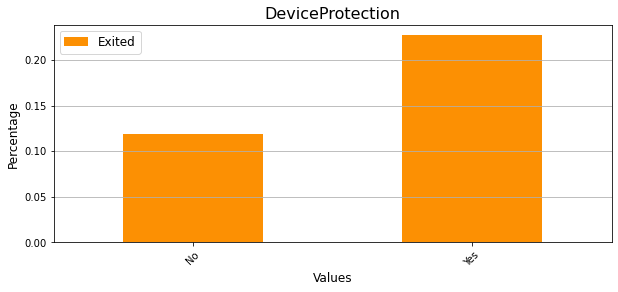

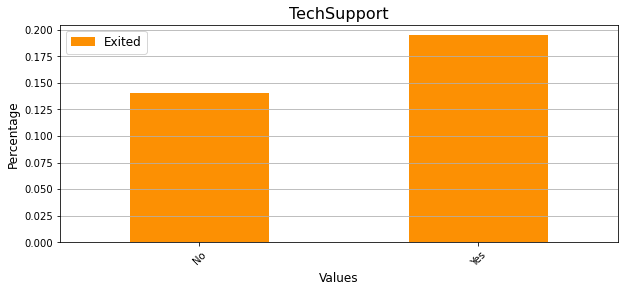

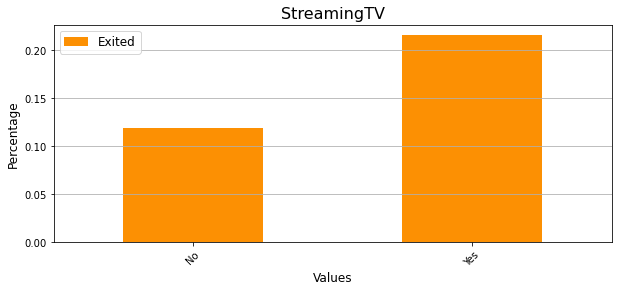

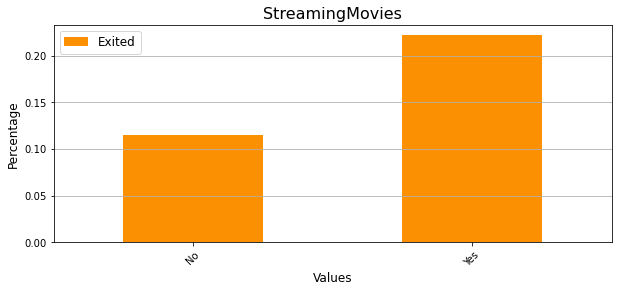

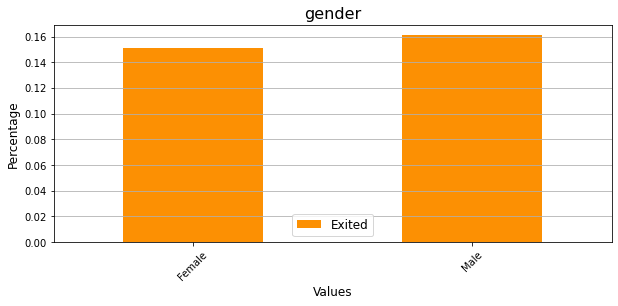

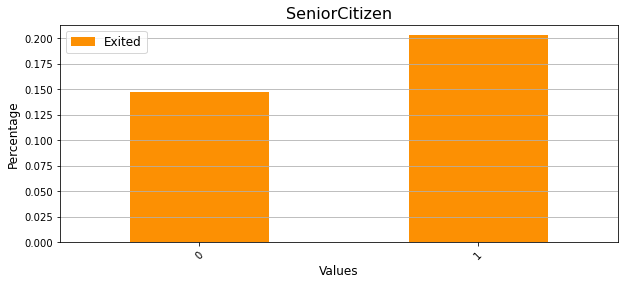

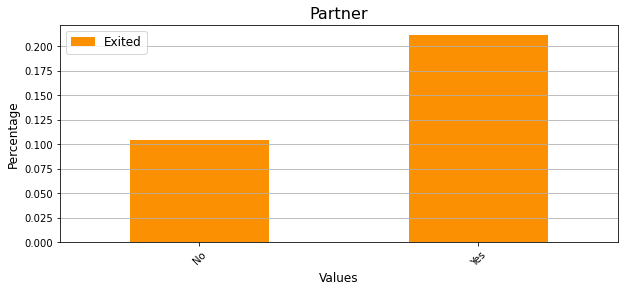

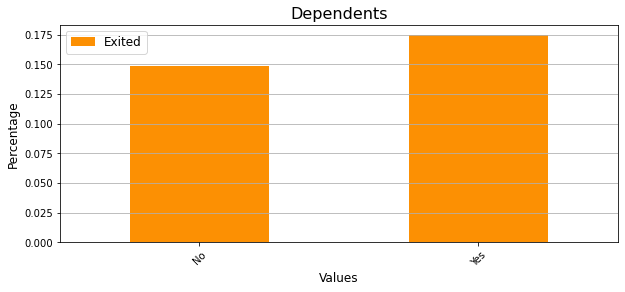

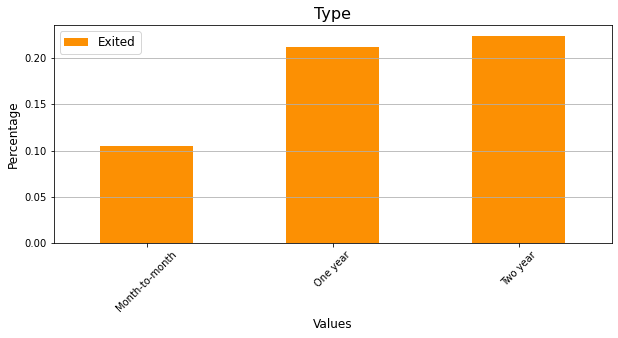

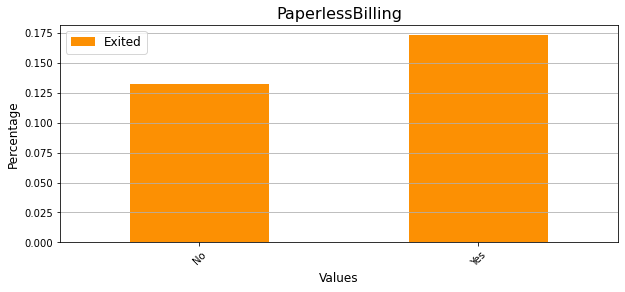

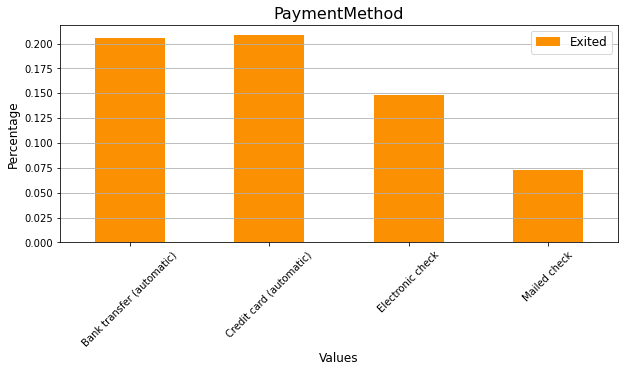

In [35]:
for val in cat_cols:
    data_t = data_full.pivot_table(index=val, values='Exited', aggfunc='mean').plot(kind='bar', rot=45, color='#fc9003', figsize=(10, 4))
    plt.title(val, fontsize=16)
    plt.legend(fontsize=12)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.grid(True, axis='y')
    plt.show()
    print('='*100)

*Изучив распределения, можно отметить следующие моменты:*

- *если смотреть на соотношение ушедших и оставшихся клиентов в распределении `MultipleLines`, то можно заметить, что отношение ушедших клиентов к оставшимся среди пользователей, подключивших опцию, больше, чем среди тех, кто ее не использовал;*
- *в распределениях признаков, связанных с дополнительными интернет опциями (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`) наблюдается аналогичная тенденция: отношение ушедших клиентов к оставшимся среди пользователей, подключивших опции, больше, чем среди тех, кто ее не использовал;*
- *также можно отметить, что клиенты, имевшие парнтера и/или иждивенцев уходили чаще, чем пользователи без них;*
- *клиенты, заключавшие контракты на один и два года уходили чаще, чем клиенты с ежемесячной оплатой;*
- *клиенты, использовавшие автоматические платежи уходили чаще.*

**Вывод:** *таким образом, сформирован следующий портрет уходящего клиента: уходящий клиент - это семейный человек с иждивенцами с высоким ежемесячным платежом. Размер платежа обусловлен большим количеством подключенных дополнительных опций.*

#### Матрица корреляций признаков

*Постороим матрицу корреляций.*

In [36]:
phik_overview = data_full.phik_matrix(interval_cols=num_cols)

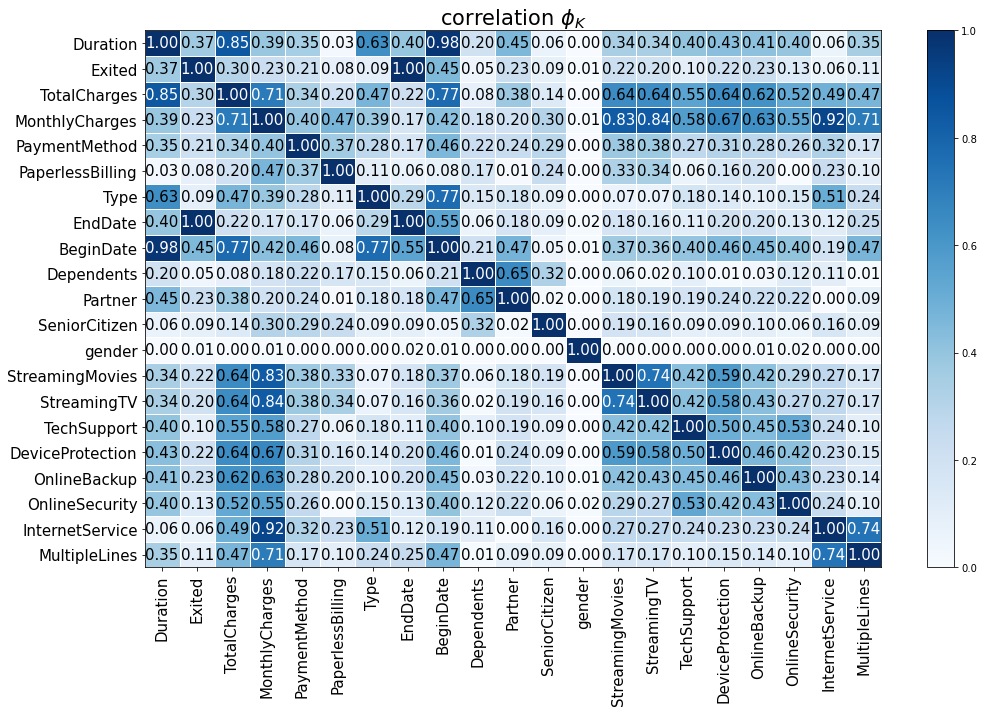

In [37]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(15, 10))
plt.tight_layout()

**Вывод:** *глядя на получившуюся матрицу корреляций, можно отметить следующие моменты:*

- *целевой признак `Exited` слабо коррелирует с большей частью признаков;*
- *признак `Duration` сильно коррелирует с признаком `TotalCharges`, что не является чем-то экстроординарным: чем больше длительность контракта, тем больше суммарная величина платежей, также заметим, что существует взаимосвязь между этим признаком и признаком `Type` - типом контракта;*
- *признак `TotalCharges` сильно коррелирует с признаком `MonthlyCharges`, а также с признаками, связанными с дополнительными услугами - также все достаточно очевидно;*
- *признак `MonthlyCharges` в свою очередь также коррелирует с признаками дополнительных услуг, в особенности, с признаками, связанными со стриммингом. Также размер ежемесячного платежа зависит от типа интернет соединения `InternetService`, и наличия опции параллельных линий телефонной связи `MultipleLines`;*
- *признак `Type` сильно коррелирует с датой заключения контракта `BeginDate`;*
- *отмечу взаимную корреляцию признаков наличия партнера `Partner` и наличия иждивенцев `Dependents`, что также не противоречит здравому смыслу;*
- *признак `Gender` не коррелирует с данными;*
- *наличие взаимосвязи между типом интернет соединения `InternetService` и признаком наличия опции параллельных линий телефонной связи `MultipleLines`.*

*Из всех имеющихся признаков удалению подлежит признак `Gender`, так как он не коррелирует с данными. Признак `TotalCharges` дублирует признаки `MonthlyCharges` и `Duration`, поэтому удалим его. Признаки `BeginDate` и `EndDate` также будут удалены в виду наличия признака `Duration`.*

### Вывод

В ходе выполнения данного шага работы был проведен исследовательский анализ данных, а именно:

- загружены и изучены данные, баланс классов;
- создан объединенный датафрейм;
- определен портрет уходящего клиента: уходящий клиент - это семейный человек с иждивенцами с высоким ежемесячным платежом. Размер платежа обусловлен большим количеством подключенных дополнительных опций;
- была исследована матрица корреляций признаков. Из всех имеющихся признаков были удалены: признак `Gender`, так как он не коррелирует с данными; признак `TotalCharges` дублирует признаки `MonthlyCharges` и `Duration`; признаки `BeginDate` и `EndDate`, в виду наличия признака `Duration`.

## Обучение моделей

### Подготовка данных к обучению

*Перед обучением моделей удалим ненужные столбцы, отделим целевой признак от остальных и разобьем датасет на тренировочную и тестовую выборки в соотношении 3 к 1.*

In [38]:
data_full = data_full.drop(['BeginDate', 'EndDate', 'gender', 'TotalCharges'], axis=1)

features = data_full.drop('Exited', axis=1)
target = data_full['Exited']

In [39]:
features_train, features_test, target_train, target_test =\
train_test_split(features, target, test_size=0.25, random_state=80523)

*Так как в датасете присутствуют категориальные признаки, необходим кодировщик, преобразующий их в числовые, а имеющиеся числовые признаки будут отмасштабированы.*

In [40]:
cat_cols.remove('gender')

In [41]:
ct = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first'), cat_cols)],
                       remainder=StandardScaler(),
                       verbose_feature_names_out = False) 

*Зададим метрики качества моделей.*

In [42]:
scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

*И напишем функцию, которая сохранит результаты моделей.*

In [43]:
def add_row(df: pd.DataFrame, model_name: str, auc: str, accuracy: str)->pd.DataFrame:
    '''
    Добавляет в датафрейм новую строчку с результатами
    '''
    df.at[len(df), df.columns[0]] = model_name
    df.at[len(df) - 1, df.columns[1]] = auc
    df.at[len(df) - 1, df.columns[2]] = accuracy
    
    return df

In [44]:
results = pd.DataFrame(columns=['Модель', 'ROC-AUC', 'Accuracy'])

**Вывод:** *данные были раззделены на целевой признак и признаки-предикторы, на обучающую и тестовую выборки в соотношении 3 к 1. Создан кодировщик, преобразующий категориальные и числовые признаки.*

### Обучение

#### Dummy

*Перед тем, как перейти к обучению сложных моделей, определим пороговое значение целевой метрики качества `ROC-AUC`. В случае, если обучаемые модели будут выдавать значение ниже порогового, будем считать, что модель работает некорректно. Пороговое значение определим с помощью Dummy-модели, которая вернет в качестве предсказания нули - все клиенты остались.*

In [45]:
predicted_dummy = np.zeros(target.shape[0])
roc_auc_dummy = roc_auc_score(target.values, predicted_dummy)
accuracy_dummy = accuracy_score(target.values, predicted_dummy)
add_row(results, 'Dummy', '%.4f'  %roc_auc_dummy, '%.4f' %accuracy_dummy)
results.iloc[-1, :]

Модель       Dummy
ROC-AUC     0.5000
Accuracy    0.8437
Name: 0, dtype: object

*Теперь, когда мы задались пороговым значением, перейдем к обучению остальных моделей.*

#### LogisticRegression

In [46]:
pipe_lr = Pipeline([('ct', ct),
                ('clf', LogisticRegression(random_state=80523))])

param_lr = dict(clf__C=[0.0001, 0.01, 1, 10, 50, 100],
                clf__max_iter=range(100, 1000, 100))

grid_lr = GridSearchCV(pipe_lr, param_grid=param_lr, cv=3, n_jobs=1, verbose=1, scoring=scoring, refit='AUC')

grid_lr.fit(features_train, target_train)

result_lr = grid_lr.cv_results_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [47]:
add_row(results, 'LogisticRegression', '%.4f'  %grid_lr.best_score_,\
        '%.4f' %grid_lr.cv_results_['mean_test_Accuracy'][grid_lr.best_index_])
results.iloc[-1, :]

Модель      LogisticRegression
ROC-AUC                 0.7547
Accuracy                0.8599
Name: 1, dtype: object

#### DecisionTreeClassifier

In [48]:
pipe_tree = Pipeline([('ct', ct),
                ('clf', DecisionTreeClassifier(random_state=80523))])

param_tree = dict(clf__criterion=['gini', 'entropy', 'log_loss'],
                  clf__max_depth=[5, 10, 15])

grid_tree = GridSearchCV(pipe_tree, param_grid=param_tree, cv=3, n_jobs=1, verbose=1, scoring=scoring, refit='AUC')

grid_tree.fit(features_train, target_train)

result_dtc = grid_tree.cv_results_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [49]:
add_row(results, 'DecisionTreeRegressor', '%.4f'  %grid_tree.best_score_,\
        '%.4f' %grid_tree.cv_results_['mean_test_Accuracy'][grid_tree.best_index_])
results.iloc[-1, :]

Модель      DecisionTreeRegressor
ROC-AUC                    0.7837
Accuracy                   0.8531
Name: 2, dtype: object

#### RandomForestClassifier

In [50]:
pipe_rfc = Pipeline([('ct', ct),
                ('clf', RandomForestClassifier(random_state=80523))])

param_rfc = dict(clf__n_estimators=[10, 50, 100],
                  clf__max_depth=[5, 10, 15])

grid_rfc = GridSearchCV(pipe_rfc, param_grid=param_rfc, cv=3, n_jobs=1, verbose=1, scoring=scoring, refit='AUC')

grid_rfc.fit(features_train, target_train)

results_rfc = grid_rfc.cv_results_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [51]:
add_row(results, 'RandomForestRegressor', '%.4f'  %grid_rfc.best_score_,\
        '%.4f' %grid_rfc.cv_results_['mean_test_Accuracy'][grid_rfc.best_index_])
results.iloc[-1, :]

Модель      RandomForestRegressor
ROC-AUC                    0.8122
Accuracy                   0.8588
Name: 3, dtype: object

#### XGBClassifier

In [52]:
pipe_xgb = Pipeline([('ct', ct),
                ('clf', xgb.XGBClassifier(random_state=80523))])

param_xgb = dict(clf__nthread=[4],
                clf__learning_rate=[0.03, 0.05, 0.07, 0.1, 0.3],
                clf__max_depth=[5, 10, 15, 20],
                clf__n_estimators=[100, 200, 300, 400, 500])

grid_xgb = GridSearchCV(pipe_xgb, param_grid=param_xgb, cv=3, n_jobs=-1, verbose=1, scoring=scoring, refit='AUC')

grid_xgb.fit(features_train, target_train)

result_xgb = grid_xgb.cv_results_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [53]:
add_row(results, 'XGBClassifier', '%.4f'  %grid_xgb.best_score_,\
        '%.4f' %grid_xgb.cv_results_['mean_test_Accuracy'][grid_xgb.best_index_])
results.iloc[-1, :]

Модель      XGBClassifier
ROC-AUC            0.8877
Accuracy           0.8987
Name: 4, dtype: object

#### LGBMClassifier 

In [54]:
pipe_lgbm = Pipeline([('ct', ct),
                ('clf', lgb.LGBMClassifier(random_state=80523))])

param_lgbm = dict(clf__n_estimators=[100, 200, 300, 400, 500],
                 clf__learning_rate=[0.03, 0.05, 0.07, 0.1, 0.3],
                 clf__max_depth=[5, 10, 15, 20],
                 clf__num_leaves=[6, 8, 12, 16])

grid_lgbm = GridSearchCV(pipe_lgbm, param_grid=param_lgbm, cv=3, n_jobs=-1, verbose=1, scoring=scoring, refit='AUC')

grid_lgbm.fit(features_train, target_train)

result_lgbm = grid_lgbm.cv_results_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


In [55]:
add_row(results, 'LGBMClassifier', '%.4f'  %grid_lgbm.best_score_,\
        '%.4f' %grid_lgbm.cv_results_['mean_test_Accuracy'][grid_lgbm.best_index_])
results.iloc[-1, :]

Модель      LGBMClassifier
ROC-AUC             0.8848
Accuracy            0.9023
Name: 5, dtype: object

#### Анализ результатов

*В результате обучения моделей были получены следующие значения метрик качества:*

In [56]:
results

,Модель,ROC-AUC,Accuracy
0,Dummy,0.5000,0.8437
1,LogisticRegression,0.7547,0.8599
2,DecisionTreeRegressor,0.7837,0.8531
3,RandomForestRegressor,0.8122,0.8588
4,XGBClassifier,0.8877,0.8987
5,LGBMClassifier,0.8848,0.9023


*Наиболее точные предсказания делают модели `XGBClassifier` и `LGBMClassifier` с разницей в несколько тысячных. В качестве основной модели выберем модель `XGBClassifier`.*

### Тестирование модели

In [57]:
pred_xgb = grid_xgb.best_estimator_.predict_proba(features_test)[:, 1]
roc_auc_xgb = roc_auc_score(target_test, pred_xgb)
print('ROC-AUC для модели XGBClassifier на тестовой выборке: ' '%.4f'  %roc_auc_xgb)

ROC-AUC для модели XGBClassifier на тестовой выборке: 0.9291


In [58]:
accuracy_xgb = accuracy_score(target_test, grid_xgb.best_estimator_.predict(features_test))
print('Accuracy для модели XGBRegressor на тестовой выборке: ' '%.4f'  %accuracy_xgb)

Accuracy для модели XGBRegressor на тестовой выборке: 0.9216


**Вывод:** *Требования заказчика выполнены. Величина ROC-AUC превышает необходимый порог, равный 0.85.*

 ### Оценка важности признаков

*Проведем исследование признаков, которые оказали наибольшее влияние на предсказания моделей.*

In [59]:
features_train_ohe = pd.DataFrame(
    pipe_xgb.named_steps['ct'].fit_transform(features_train),
    columns=pipe_xgb.named_steps['ct'].get_feature_names_out()
)

In [60]:
shap_test = shap.TreeExplainer(grid_xgb.best_estimator_.named_steps['clf']).shap_values(features_train_ohe)

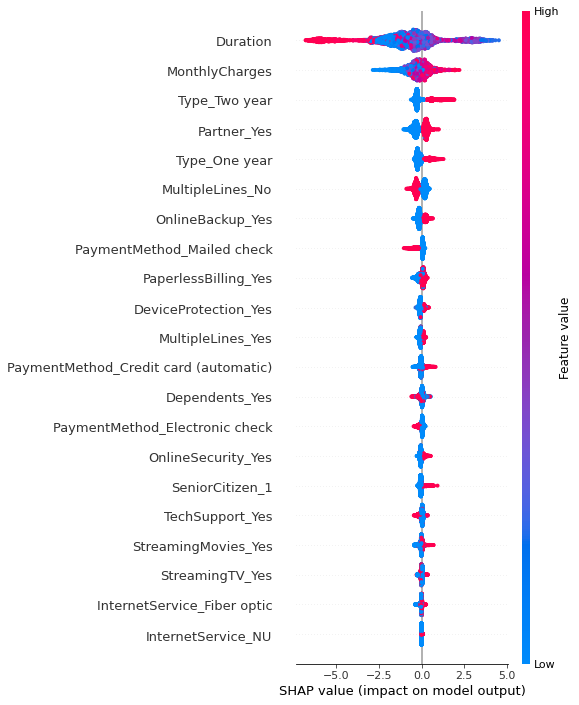

In [61]:
shap.summary_plot(shap_test, features_train_ohe,
                      max_display=25, auto_size_plot=True)

**Вывод:** *в результате исследования влияния признаков можно выделить топ-3 признака, оказывающих наибольшее влияние на предсказания модели:*
- *признак `Duration`. Получили картинку, как и на violinplot выше: чем больше человек является клиентом оператора, тем выше вероятность того, что он останется. Уходящий пользователь является клиентом значительно меньшее количество времени;*
- *признак `MonthlyCharges`. Чем выше размер месячной платы, тем выше вероятность того, что клиент уйдет;*
- *признак `Type_Two year`. Клиенты, подписавшие контракт на 2 года, уходят с большей вероятностью.*

*Наименьшее влияние на предсказания модели оказывают признаки `InternetService`, `StreamingTV` и `StreamingMovies`. Проверим, приведет ли удаление этих признаков к улучшению качества предсказаний.*

### Доработка итоговой модели

#### Удаление признака InternetService, объединение StreamingTV и StreamingMovies

*Так как признаки `StreamingTV` и `StreamingMovies` сильно коррелируют между собой, попробуем объединить их в один признак. Удалим признак `InternetService`, оказывающий наименьшее влияние на предсказания моделей.*

In [62]:
data_fi = data_full.copy()
data_temp = pd.DataFrame()
data_temp['TV'] = (data_full['StreamingTV'] == 'Yes').astype('int64')
data_temp['Movie'] = (data_full['StreamingMovies'] == 'Yes').astype('int64')
data_temp['Streaming'] = data_temp['TV'] + data_temp['Movie']
data_fi['Streaming'] = data_temp['Streaming'].apply(lambda x: 0 if x == 0 else 1)
data_fi = data_fi.drop(['StreamingTV', 'StreamingMovies', 'InternetService'], axis=1)

cat_cols_fi = [col for col in data_fi.columns if col not in num_cols \
            and col not in ['BeginDate', 'EndDate', 'Exited']]

features_fi = data_fi.drop('Exited', axis=1)
target_fi = data_fi['Exited']

features_train_fi, features_test_fi, target_train_fi, target_test_fi =\
train_test_split(features_fi, target_fi, test_size=0.25, random_state=80523)

*Подготовим pipeline для преобразования категориальных признаков и обучения модели. Обучим модель.*

In [63]:
ct_fi = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first'), cat_cols_fi)],
                       remainder=StandardScaler()) 

In [64]:
pipe_xgb_fi = Pipeline([('ct', ct_fi),
                ('clf', xgb.XGBClassifier(random_state=80523))])

param_xgb_fi = dict(clf__nthread=[4],
                clf__learning_rate=[0.03, 0.05, 0.07, 0.1, 0.3],
                clf__max_depth=[5, 10, 15, 20],
                clf__n_estimators=[100, 200, 300, 400, 500])

grid_xgb_fi = GridSearchCV(pipe_xgb_fi, param_grid=param_xgb_fi, cv=3, n_jobs=-1, verbose=1, scoring=scoring, refit='AUC')

grid_xgb_fi.fit(features_train_fi, target_train_fi)

result_xgb_fi = grid_xgb_fi.cv_results_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


*Выведем результаты обучения.*

In [65]:
print('Результаты модели XGBClassifier на обучающей выборке: ROC-AUC=' '%.4f'  %grid_xgb_fi.best_score_,\
        ', Accuracy=%.4f' %grid_xgb_fi.cv_results_['mean_test_Accuracy'][grid_xgb_fi.best_index_])

Результаты модели XGBClassifier на обучающей выборке: ROC-AUC=0.8872 , Accuracy=0.8978


*Результаты модели на обучающей выборке незначительно ухудшились. Проверим модель на тестовой выборке.*

In [66]:
pred_xgb_fi = grid_xgb_fi.best_estimator_.predict_proba(features_test_fi)[:, 1]
roc_auc_xgb_fi = roc_auc_score(target_test_fi, pred_xgb_fi)
print('ROC-AUC для модели XGBClassifier на тестовой выборке: ' '%.4f'  %roc_auc_xgb_fi)

ROC-AUC для модели XGBClassifier на тестовой выборке: 0.9296


In [67]:
accuracy_xgb_fi = accuracy_score(target_test_fi, grid_xgb_fi.best_estimator_.predict(features_test_fi))
print('Accuracy для модели XGBRegressor на тестовой выборке: ' '%.4f'  %accuracy_xgb_fi)

Accuracy для модели XGBRegressor на тестовой выборке: 0.9284


*Результат стал лучше, но незначительно.*

#### Удаление признака InternetService, Объединение признаков дополнительных опций в один

*Проверим, приведет ли удаление признака `InternetService` и объединение признаков дополнительных опций к улучшению признаков.*

In [68]:
data_un = data_full.copy()

*Создадим признак `AdditionalServices` - количесвто подлкюченных дополнительных опций.*

In [69]:
add_ser = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for val in add_ser:
    data_un[val] = (data_un[val] == 'Yes').astype('int64')
    
data_un['AdditionalServices'] = data_un['OnlineSecurity'] + data_un['OnlineBackup']\
+ data_un['DeviceProtection'] + data_un['TechSupport'] + data_un['StreamingTV'] + data_un['StreamingMovies']

*Удалим признаки дополнительных опций.*

In [70]:
data_un = data_un.drop(add_ser, axis=1)

In [71]:
num_cols_un = ['MonthlyCharges', 'Duration', 'AdditionalServices']
cat_cols_un = [col for col in data_un.columns if col not in num_cols_un]

*Построим матрицу корреляций, проверим как новый признак коррелирует с остальными.*

In [72]:
phik_overview_un = data_un.phik_matrix(interval_cols=num_cols_un)

In [73]:
cordata=phik_overview_un['AdditionalServices']

In [74]:
cordata = cordata[:, np.newaxis]

<AxesSubplot:>

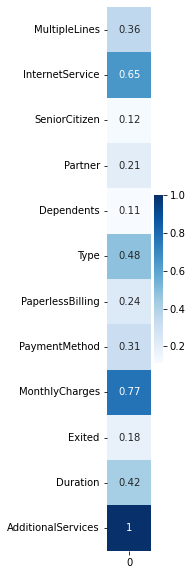

In [75]:
plt.figure(figsize=(1, 10))
sns.heatmap(cordata, yticklabels=phik_overview_un['AdditionalServices'].index, cmap='Blues', annot=True)

*Как мы видим, наш новый признак сильно коррелирует с `MonthlyCharges`, что неизбежно, и с `InternetService`. Признак `InternetService` будет удален.*

In [76]:
data_un = data_un.drop('InternetService', axis=1)

In [77]:
cat_cols_un.remove('InternetService')

cat_cols_un.remove('Exited')

*Подготовим данные к обучению. Подготовим pipeline для преобразования категориальных признаков и обучения модели. Обучим модель.*

In [78]:
features_un = data_un.drop('Exited', axis=1)
target_un = data_un['Exited']

features_train_un, features_test_un, target_train_un, target_test_un =\
train_test_split(features_un, target_un, test_size=0.25, random_state=80523)

In [79]:
ct_un = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first'), cat_cols_un)],
                       remainder=StandardScaler()) 

In [80]:
pipe_xgb_un = Pipeline([('ct', ct_un),
                ('clf', xgb.XGBClassifier(random_state=80523))])

param_xgb_un = dict(clf__nthread=[4],
                clf__learning_rate=[0.03, 0.05, 0.07, 0.1, 0.3],
                clf__max_depth=[5, 10, 15, 20],
                clf__n_estimators=[100, 200, 300, 400, 500])

grid_xgb_un = GridSearchCV(pipe_xgb_un, param_grid=param_xgb_un, cv=3, n_jobs=-1, verbose=1, scoring=scoring, refit='AUC')

grid_xgb_un.fit(features_train_un, target_train_un)

result_xgb_un = grid_xgb_un.cv_results_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [81]:
print('Результаты модели XGBClassifier на обучающей выборке: ROC-AUC=' '%.4f'  %grid_xgb_un.best_score_,\
        ', Accuracy=%.4f' %grid_xgb_un.cv_results_['mean_test_Accuracy'][grid_xgb_un.best_index_])

Результаты модели XGBClassifier на обучающей выборке: ROC-AUC=0.8930 , Accuracy=0.9008


*Результаты модели на обучающей выборке незначительно улучшились.*

In [82]:
pred_xgb_un = grid_xgb_un.best_estimator_.predict_proba(features_test_un)[:, 1]
roc_auc_xgb_un = roc_auc_score(target_test_un, pred_xgb_un)
print('ROC-AUC для модели XGBClassifier на тестовой выборке: ' '%.4f'  %roc_auc_xgb_un)

ROC-AUC для модели XGBClassifier на тестовой выборке: 0.9266


In [83]:
accuracy_xgb_un = accuracy_score(target_test_un, grid_xgb_un.best_estimator_.predict(features_test_un))
print('Accuracy для модели XGBRegressor на тестовой выборке: ' '%.4f'  %accuracy_xgb_un)

Accuracy для модели XGBRegressor на тестовой выборке: 0.9262


*ROC-AUC на тестовой выборке снизился, но Accuracy увеличилась. Разница незначительная.*

**Вывод:** *Удаление признаков, оказывающих наименьшее влияние на предсказания модели, не привело к значительному улучшению качества предсказания модели.*

### Оценка прибыльности модели

*Проведем оценку прибыльности нашей модели. Для этого построим матрицу ошибок предсказания модели.*

In [84]:
predicted = grid_xgb.best_estimator_.predict(features_test)

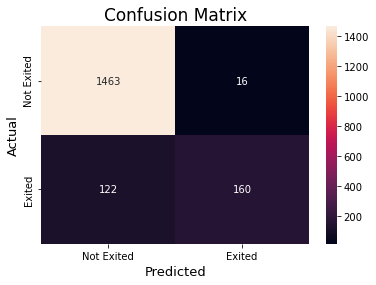

In [85]:
cm = confusion_matrix(target_test, predicted)
 
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Exited','Exited'],
            yticklabels=['Not Exited','Exited'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

*Проведем расчет прибыльности. Будем считать, что пользователям, которые модель определила как уходящих клиентов, предоставляется скидка в 15%. Скидка благоприятно для компании воздействует на клиента и они остаются. Но модель также может неверно определить уходящего пользователя, из-за чего пользователи, которые не собирались уходить, тоже получают скидку.*

In [86]:
MC_mean = features_test['MonthlyCharges'].mean()

In [87]:
discount = 0.15
profit = MC_mean * (1 - discount) * cm[1, 1] - MC_mean * discount * cm[0, 1]
print('Модель позволила сохранить компании:', '%.1f' %profit)

Модель позволила сохранить компании: 8550.8


**Вывод:** в результате проведенного исследования мы подтвердили, что разработанная модель является прибыльной.

### Вывод

В ходе выполнения данного шага работы была проведено обучение моделей, а именно:
- данные были подготовлены к обучению моделей. Категориальные признаки кодировались с помощью `OneHotEncoder`, а числовые - `StandardScaller`;
- обучение моделей на тренировочкой выборке. были получены следующие результаты:

In [88]:
display(results)

,Модель,ROC-AUC,Accuracy
0,Dummy,0.5000,0.8437
1,LogisticRegression,0.7547,0.8599
2,DecisionTreeRegressor,0.7837,0.8531
3,RandomForestRegressor,0.8122,0.8588
4,XGBClassifier,0.8877,0.8987
5,LGBMClassifier,0.8848,0.9023


- наилучший результат по метрике ROC-AUC показала модель XGBCLassifier. Она и была выбранав качестве основной;
- тестирование модели. ROC-AUC для модели XGBClassifier на тестовой выборке: 0.9266, что превышает требование по точности от заказчика;
- оценка важности признаков. 
    - в результате исследования влияния признаков можно выделить топ-3 признака, оказывающих наибольшее влияние на предсказания модели:
        - признак Duration. Получили картинку, как и на violinplot выше: чем больше человек является клиентом оператора, тем выше вероятность того, что он останется. Уходящий пользователь является клиентом значительно меньшее количество времени;
        - признак MonthlyCharges. Чем выше размер месячной платы, тем выше вероятность того, что клиент уйдет;
        - признак Type_Two year. Клиенты, подписавшие контракт на 2 года, уходят с большей вероятностью.
    - наименьшее влияние на предсказания модели оказывают признаки InternetService, StreamingTV и StreamingMovies.
- была предпринята попытка улучшить показатели модели путем удаления признаков, оказывающих наименьшее влияние на предсказания модели. К значительным улучшениям это не привело.
- была проведена оценка прибыльности модели. Согласно этой оценки модель на тестовой выборке позволила сохранить компании около 6500 у.е. в месяц.

## Отчет по работе

**Цель проекта:** для оператора связи "Ниединогоразрыва.ком" необходимо разработать модель прогнозирования оттока клиентов для планирования мер, направленных на удержание клиента (промокоды и специальные условия). 

Целевая метрика качества модели - `ROC-AUC`. Дополнительная метрика качества - `accuracy`.

**Примечание:** информация о договорах актуальна на 1 февраля 2020.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
-  Интернет. Подключение может быть двух типов: через телефонную линию (*DSL*) или оптоволоконный кабель (*Fiber optic*).  

**Дополнительные услуги**:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).


В моем распоряжении 4 датасета: `Phone`, `Internet`, `Personal` и `Contract`. Данные были загружены и изучены. Отмечу некоторые моменты.

`Phone`

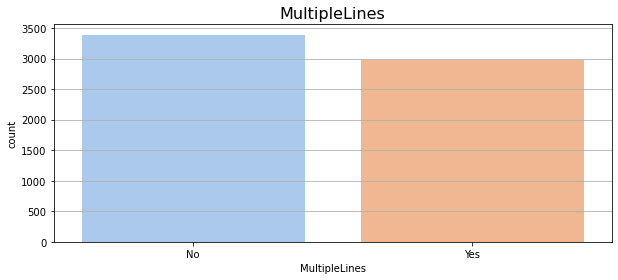

In [89]:
val_count(phone)

Датафрейм `Phone` содержит информацию о пользователях стационарной телефонной связи. В стоблце `MultipleLines` указано, подключена ли у пользователя опция, позволяющая вести параллельные линии во время звонка. Гистограмма данного признака демострирует нам, что количество абонентов без данной опции слегка превышает количество абонентов, использующих ее. Пропуски и дубликаты отсутствуют.

`Internet`

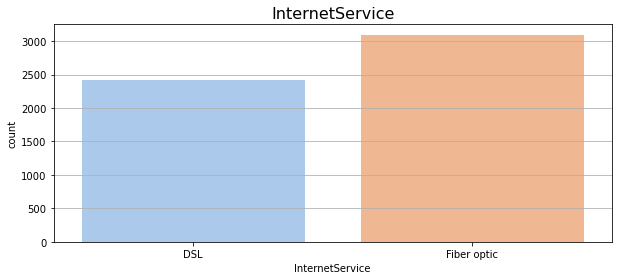

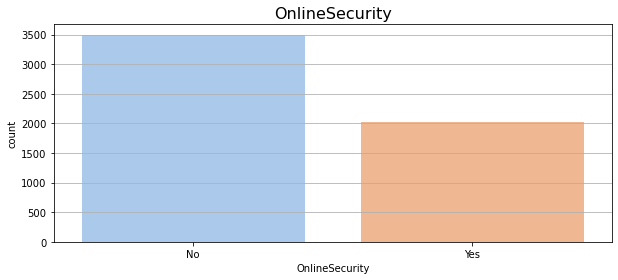

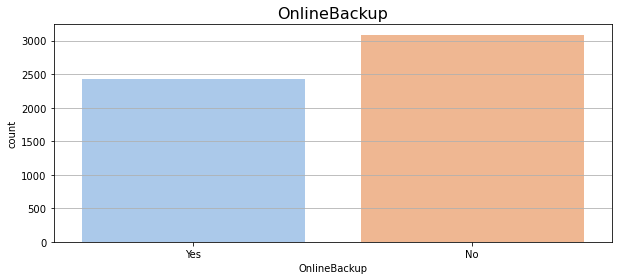

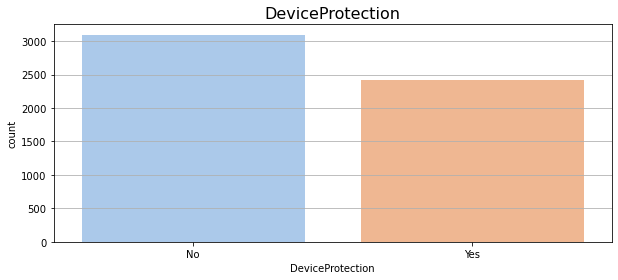

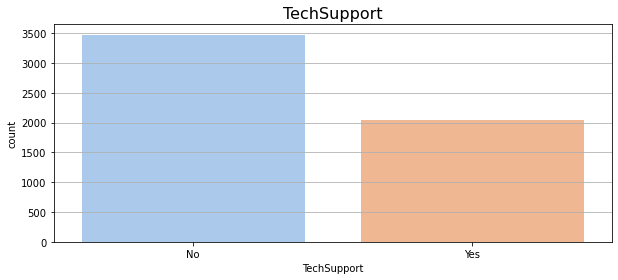

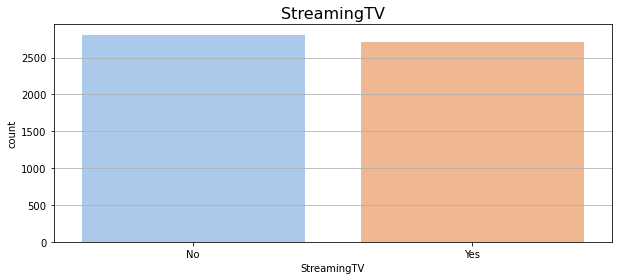

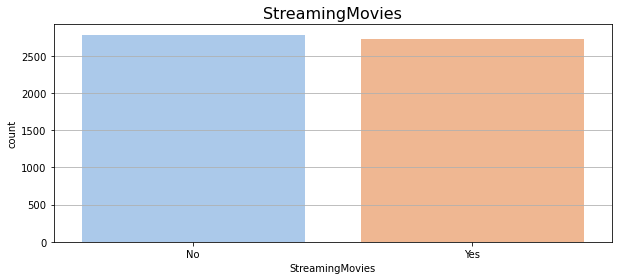

In [90]:
val_count(internet)

Датафрейм `Internet` содержит информацию о пользователях интернет-услуг: какой тип соединения они используют, какие дополнительные услуги подключены. Можем увидеть, что число клиентов, использующих оптоволоконный кабель, превышает число клиентов с другим типом соединения. Также можно отметить, что клиенты оператора реже подключают себе услуги, связанные с защитой устройств, фильтрацией контента, технической поддержкой и облачными хранилищами. А вот стримминговые сервисы подлкючаются с большей охотой: количество людей с подключенной опцией примерно равно количеству людей, ее не использующей. Строки-дубликаты и пропуски отсутствуют.

`Personal`

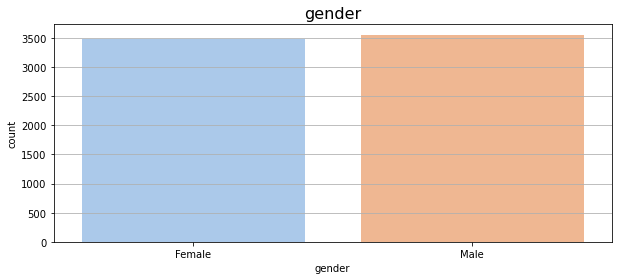

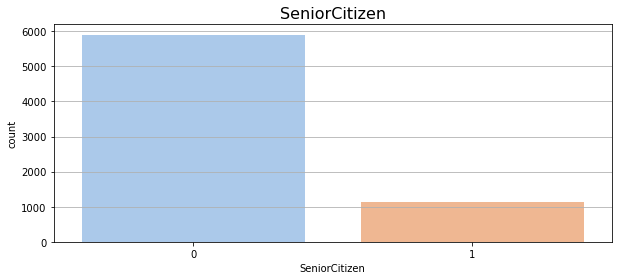

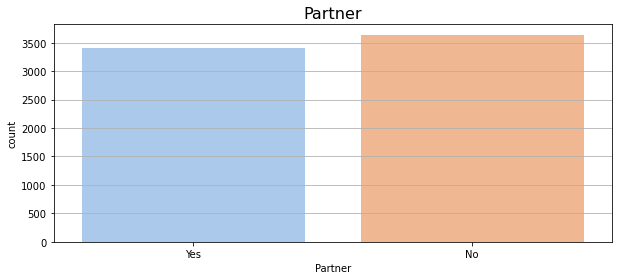

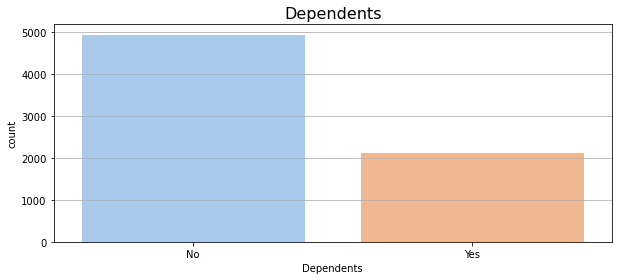

In [91]:
val_count(personal)

Датафрейм `Personal` содержит информацию о персональных данных клиента. Мы можем наблюдать примерное равенство количества пользотелей-мужчин и пользователей-женщин, так же можно сказать и о холостых пользователях и пользователях, состоящих в браке, хотя в данном случае разница более ощутима. Отметим, что по большей части услугами оператора связи пользуются люди, не достигшие пенсионного возраста и не имеющие иждивенцев.

`Contract`

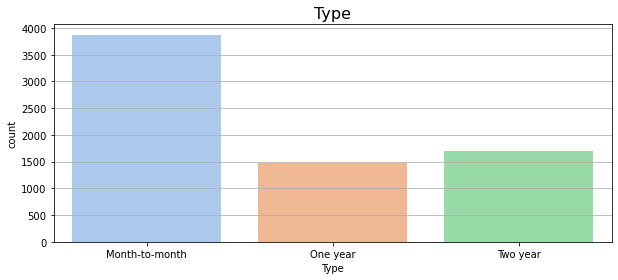

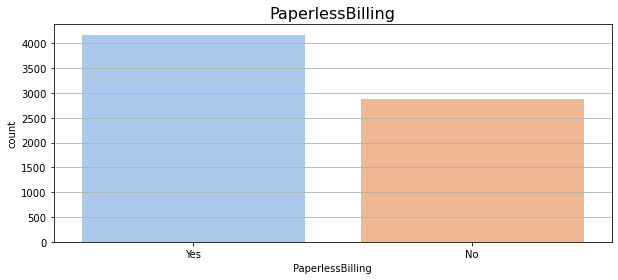

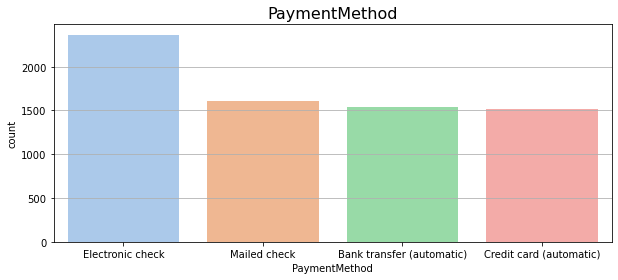

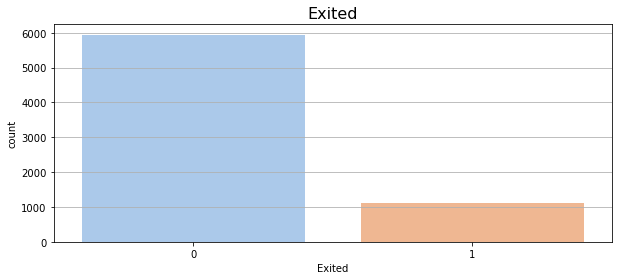

In [92]:
val_count(contract)

Датафрейм `Contract` содержит информацию о контрактах клиентов оператора связи: даты заключения и расторжения договора, тип контракта, способы и размеры оплаты. С некоторыми данными возникли небольшие проблемы, в частности, в столбце `TotalCharges` у клиентов, заключивших договор в день выгрузки таблиц, отсутствовали значения. Эти пропуски были заполнены величиной месячного платежа. Также возникли подозрения о наличии аномальных значений в этом же столбце, но после подробного изучения этих клиентов было принято решение оставить эти данные. 

На основе информации из столбца `EndDate` был создан целевой для будущих моделей признак `Exited` по следующему принципу: наличие даты в столбце `EndDate` говорит о том, что клиент ушел, а значение "No" - клиент остался.

После проведения первичного ознакомления и анализа имеющихся данных был намечен следующий план работы:

Этап 1. Объединение и последующий анализ полного датафрейма.
- заполнение пропусков;
- создание новых признаков;
- создание целевого признака на основе признака `EndDate`;
- определение портрета уходящего клиента;
- составление матрицы корреляций признаков;

Этап 2. Обучение модели.
- подготовка данных к обучению:
    - разбиение данных на целевой признак и признаки-предикторы;
    - разбиение данных на обучающую и тестовую выборки в соотношении 3 к 1;
    - обработка категориальных признаков с помощью `OneHotEncoder`, числовых - с помощью `StandardScaller`;
- обучение моделей МО, выбор лучшей из них по метрике качества ROC-AUC;
- тестирование модели;
- оценка важности признаков-предикторов;
- доработка модели;

Этап 3. Отчет по работе.
- написание отчета по работе;

Пройдемся по каждому этапу работы.

`Этап 1. Объединение и последующий анализ полного датафрейма.`

В ходе выполнения первого этапа работы был создан объединенный датафрейм, заполнены пропуски, образовавшиеся при объединении, и создан новый признак `Duration`. Составлен портрет уходящего клиента. Подробнее о нем.

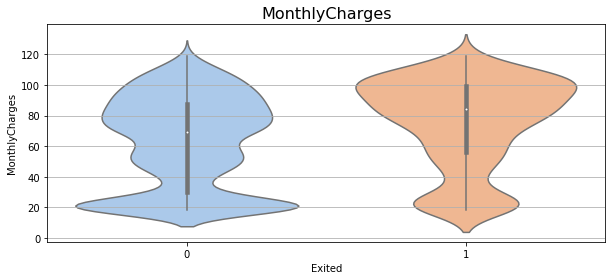

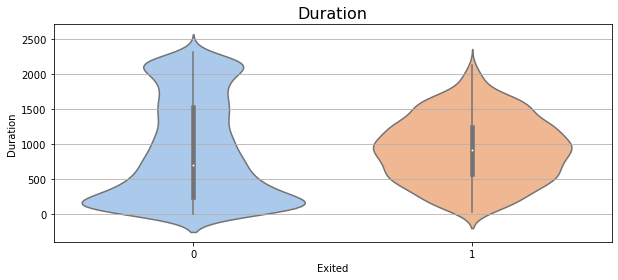

In [93]:
for val in ['MonthlyCharges', 'Duration']:
    plt.figure(figsize=(10, 4))
    sns.violinplot(data=data_full, x='Exited', y=val, palette='pastel')
    plt.title(val, fontsize=16)
    plt.grid(True, axis='y')
    plt.show()
    print('='*100)

Глядя на получившиеся графики можно сразу отметить, что ушедшие пользователи были обременены высокой месячной платой.

Если говорить о времени, прошедшем с момента заключения контракта, то можем отметить два пика на графике оставшихся клиентов: первый пик - относительно новые клиенты, второй - пользователи, являющиеся клиентами оператора более 2000 дней. В случае с ушедшими пользователями наблюдается распределение близкое к нормальному.

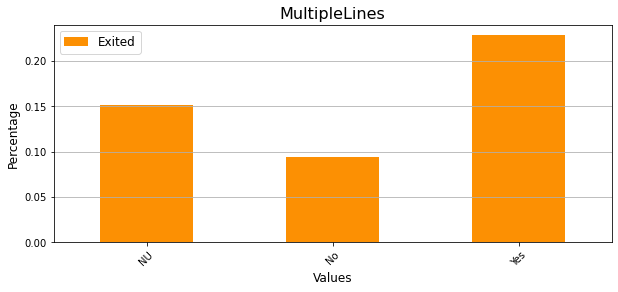

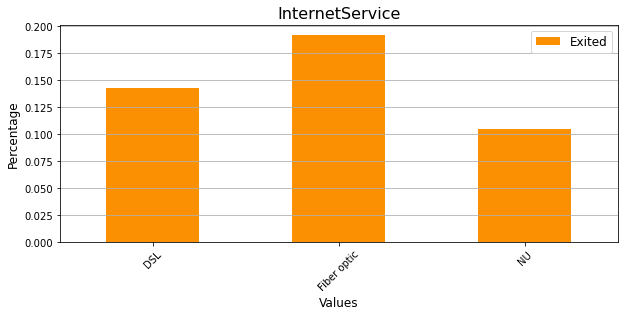

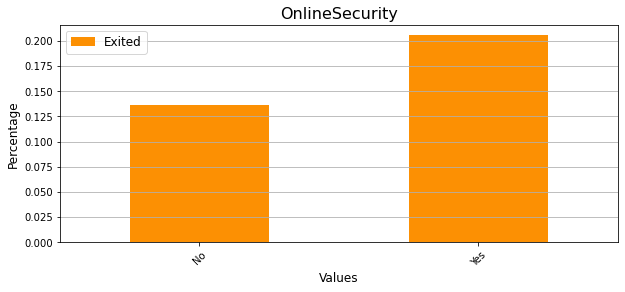

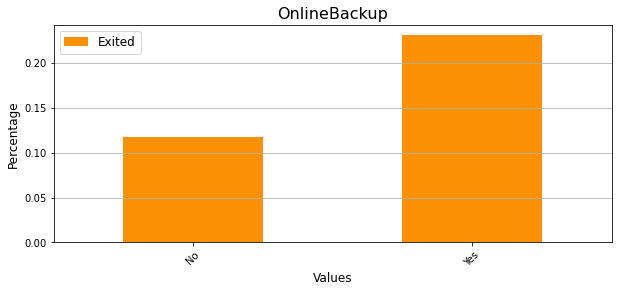

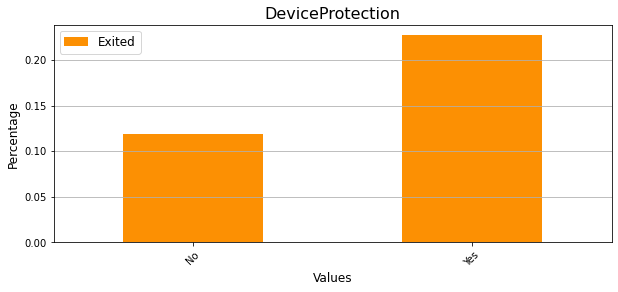

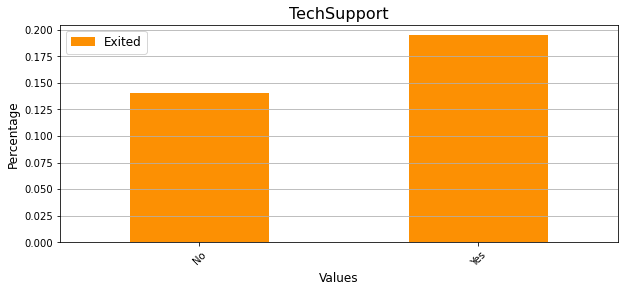

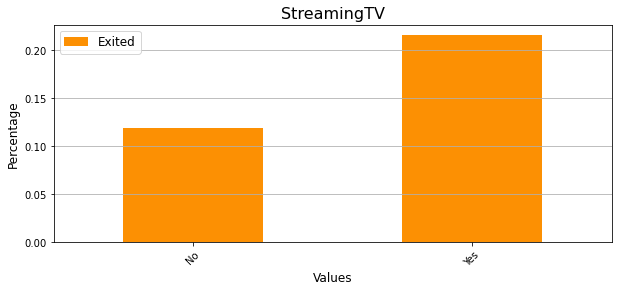

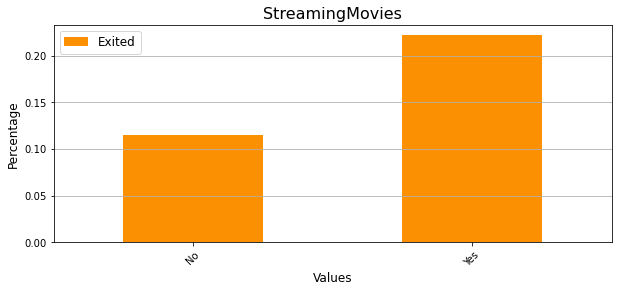

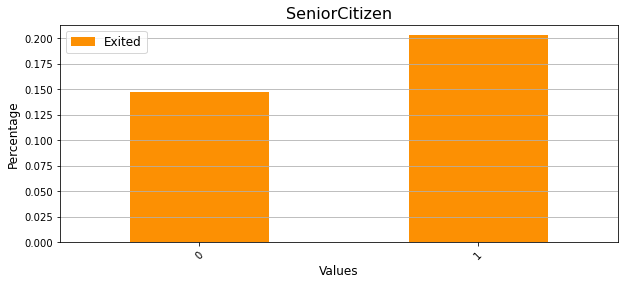

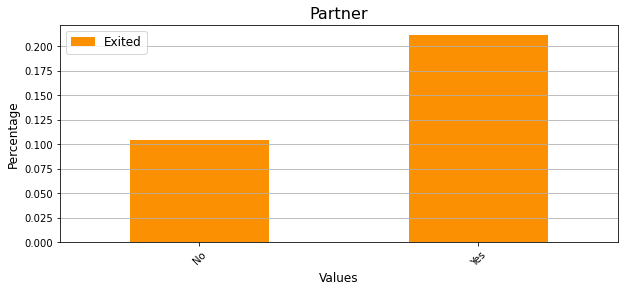

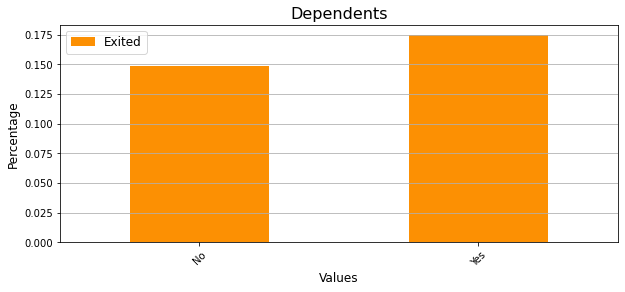

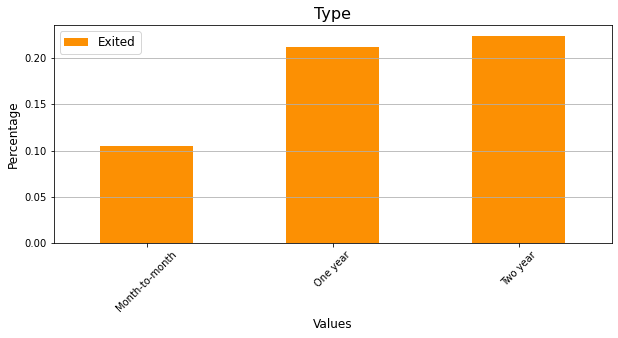

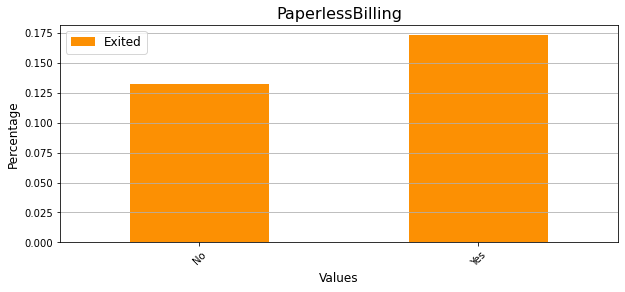

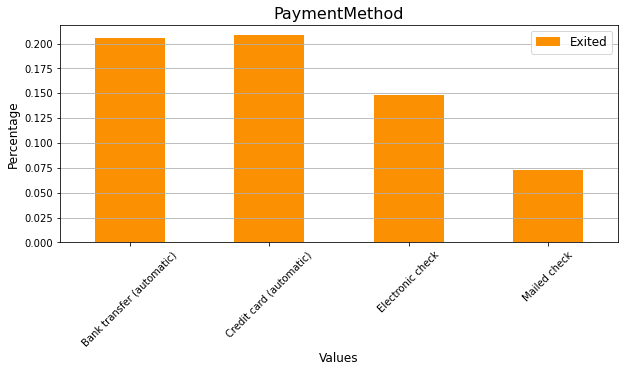

In [94]:
for val in cat_cols:
    data_t = data_full.pivot_table(index=val, values='Exited', aggfunc='mean').plot(kind='bar', rot=45, color='#fc9003', figsize=(10, 4))
    plt.title(val, fontsize=16)
    plt.legend(fontsize=12)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.grid(True, axis='y')
    plt.show()
    print('='*100)

Изучив распределения, можно отметить следующие моменты:

- если смотреть на соотношение ушедших и оставшихся клиентов в распределении `MultipleLines`, то можно заметить, что отношение ушедших клиентов к оставшимся среди пользователей, подключивших опцию, больше, чем среди тех, кто ее не использовал;
- в распределениях признаков, связанных с дополнительными интернет опциями (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`) наблюдается аналогичная тенденция: отношение ушедших клиентов к оставшимся среди пользователей, подключивших опции, больше, чем среди тех, кто ее не использовал;
- также можно отметить, что клиенты, имевшие парнтера и/или иждивенцев уходили чаще, чем пользователи без них;
- клиенты, заключавшие контракты на один и два года уходили чаще, чем клиенты с ежемесячной оплатой;
- клиенты, использовавшие автоматические платежи уходили чаще.

Таким образом, сформирован следующий портрет уходящего клиента: уходящий клиент - это семейный человек с иждивенцами с высоким ежемесячным платежом. Размер платежа обусловлен большим количеством подключенных дополнительных опций.

Была составлена и изучена матрица корреляции признаков. В результате из всех имеющихся признаков удалению подлежит признак `Gender`, так как он не коррелирует с данными. Признак `TotalCharges` дублирует признаки `MonthlyCharges` и `Duration`, поэтому удалим его. Признаки `BeginDate` и `EndDate` также будут удалены в виду наличия признака `Duration`.

`Этап 2. Обучение модели.`

В ходе выполнения данного этапа работы данные были разделены на целевой признак и признаки-предикторы, на обучающую и тестовую выборки в соотношении 3 к 1. Создан кодировщик, преобразующий категориальные признаки с помощью `OneHotEncoder` и числовые признаки - с помощью `StandardScaler`.

Обучены разные модели МО. Результаты предствалены ниже.

In [95]:
results

,Модель,ROC-AUC,Accuracy
0,Dummy,0.5000,0.8437
1,LogisticRegression,0.7547,0.8599
2,DecisionTreeRegressor,0.7837,0.8531
3,RandomForestRegressor,0.8122,0.8588
4,XGBClassifier,0.8877,0.8987
5,LGBMClassifier,0.8848,0.9023


Наиболее точные предсказания делают модели `XGBClassifier` и `LGBMClassifier` с разницей в несколько тысячных. В качестве основной модели выберем модель `XGBClassifier`. Модель обладает следующими гиперпараметрами:

In [96]:
print(f'Параметры модели: {grid_xgb.best_params_}')

Параметры модели: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 500, 'clf__nthread': 4}


На тестовой выборке выбранная модель показала следующие результаты:

In [97]:
print('ROC-AUC для модели XGBClassifier на тестовой выборке: ' '%.4f'  %roc_auc_xgb)

ROC-AUC для модели XGBClassifier на тестовой выборке: 0.9291


In [98]:
print('Accuracy для модели XGBRegressor на тестовой выборке: ' '%.4f'  %accuracy_xgb)

Accuracy для модели XGBRegressor на тестовой выборке: 0.9216


Требования заказчика выполнены. Величина ROC-AUC превышает необходимый порог, равный 0.85.

Была проведена оценка важности признаков. 
- в результате исследования влияния признаков можно выделить топ-3 признака, оказывающих наибольшее влияние на предсказания модели:
    - признак `Duration`. Получили картинку, как и на violinplot выше: чем больше человек является клиентом оператора, тем выше вероятность того, что он останется. Уходящий пользователь является клиентом значительно меньшее количество времени;
    - признак `MonthlyCharges`. Чем выше размер месячной платы, тем выше вероятность того, что клиент уйдет;
    - признак `Type_Two year`. Клиенты, подписавшие контракт на 2 года, уходят с большей вероятностью.
- наименьшее влияние на предсказания модели оказывают признаки `InternetService`, `StreamingTV` и `StreamingMovies`.

Также была предпринята попытка улучшить показатели модели путем удаления признаков, оказывающих наименьшее влияние на предсказания модели:

- удаление признака InternetService, объединение StreamingTV и StreamingMovies. Так как признаки `StreamingTV` и `StreamingMovies` сильно коррелируют между собой, попробуем объединить их в один признак. Удалим признак `InternetService`, оказывающий наименьшее влияние на предсказания моделей.
- удаление признака InternetService, Объединение признаков дополнительных опций в один.

К значительным улучшениям это не привело.

Была проведена оценка прибыльности/убыточности модели. При проведении расчета были приняты следующие допущения: будем считать, что пользователям, которые модель определила как уходящих клиентов, предоставляется скидка в 15%. Скидка благоприятно для компании воздействует на клиента и они остаются. 

Модель также может неверно определить уходящего пользователя, из-за чего пользователи, которые не собирались уходить, тоже получают скидку. Также стоит учесть пользователей, которых модель определила неверно, и они ушли.

Согласно проведенного исследования модель на тестовой выборке позволила сохранить компании около 8550 у.е. в месяц.

В результате проведенной работы была получена модель МО, удовлетворяющая требованиям по точности заказчика, в связи с чем считаю поставленную задачу выполненной.